In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as ss
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import missingno as msno
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

from sklearn.metrics import classification_report

sns.set_theme(style='darkgrid')

In [2]:
data = pd.read_csv('dataset/credit_risk_dataset.csv')

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
data.isnull().sum().sort_values(ascending=False)/len(data)*100

loan_int_rate                 9.563856
person_emp_length             2.747000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [8]:
gg = {k.name: v for k, v in data.columns.to_series().groupby(data.dtypes).groups.items()}
for i in gg["object"]:
    print("-> Columna (Variable) : "+i)
    print(data[i].unique())

-> Columna (Variable) : person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
-> Columna (Variable) : loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
-> Columna (Variable) : loan_grade
['D' 'B' 'C' 'A' 'E' 'F' 'G']
-> Columna (Variable) : cb_person_default_on_file
['Y' 'N']


<AxesSubplot:>

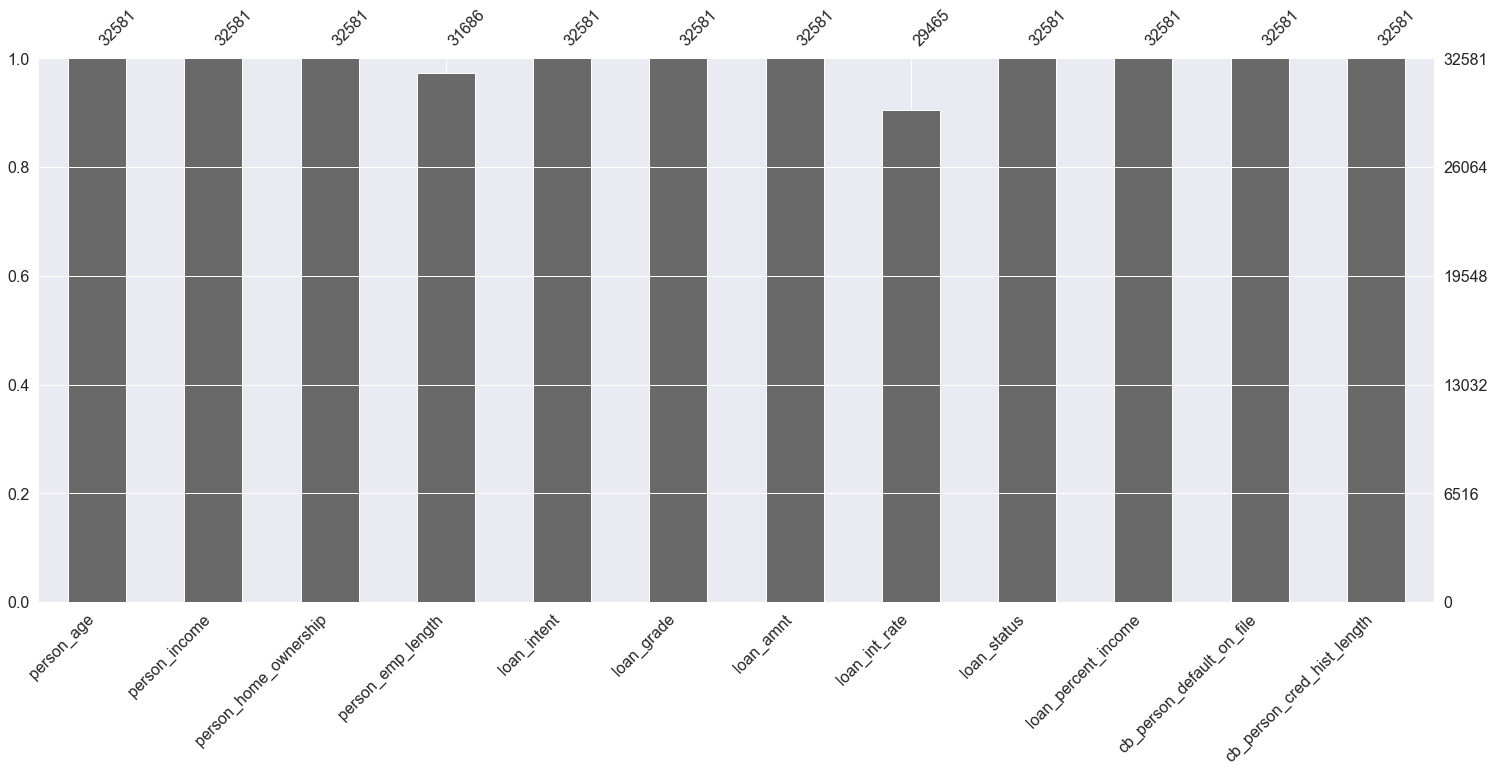

In [9]:
msno.bar(data)

<AxesSubplot:>

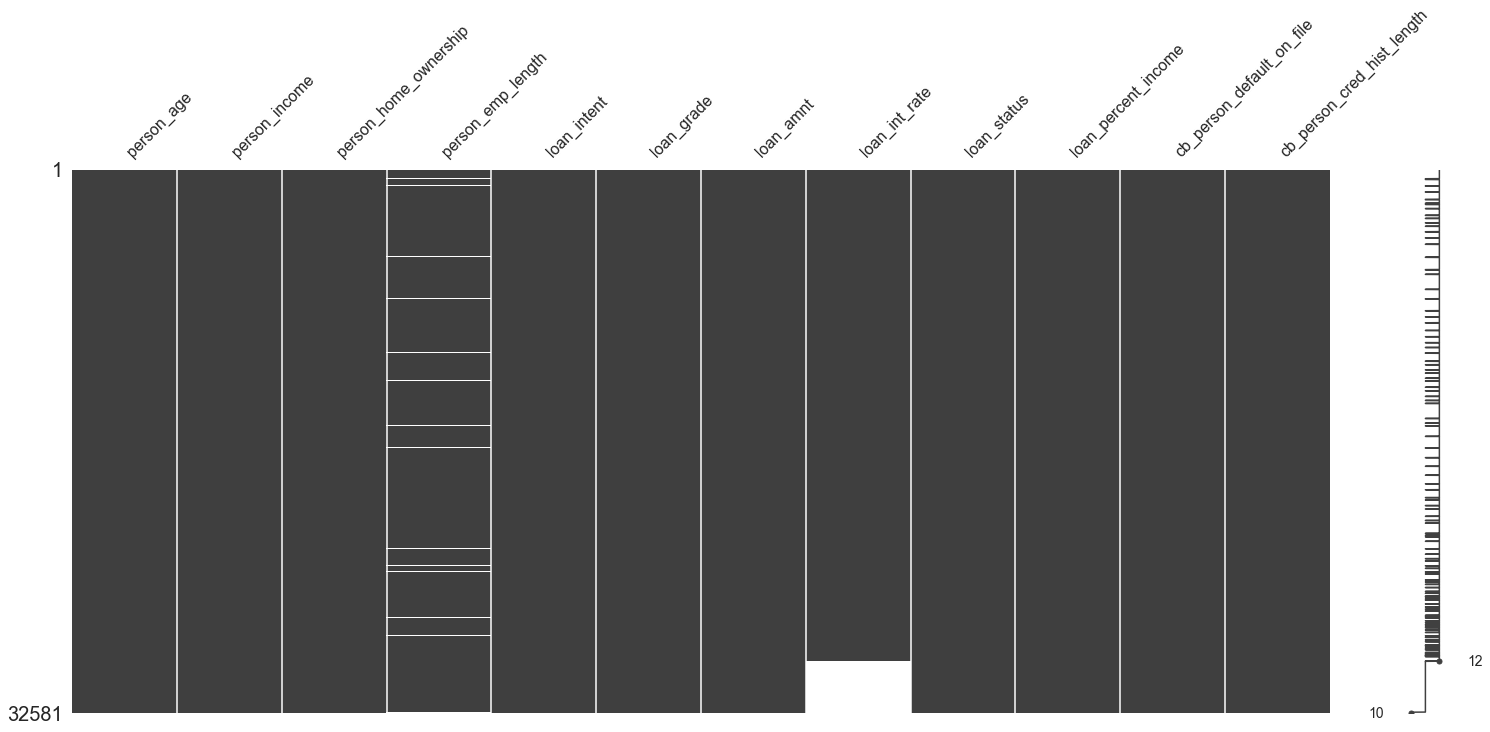

In [10]:
msno.matrix(data.sort_values(["loan_int_rate","person_emp_length"]))

In [11]:
data.sample()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
25097,31,34000,RENT,0.0,MEDICAL,C,12000,13.16,1,0.35,Y,9


#### Variable _loan_int_rate_

In [12]:
data[~data.loan_int_rate.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [13]:
data[data.loan_int_rate.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [14]:
data.loan_int_rate.describe()

count    29465.000000
mean        11.011695
std          3.240459
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

#### Variable person_emp_length

In [15]:
data[~data.person_emp_length.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [16]:
data[data.person_emp_length.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [17]:
data.person_emp_length.describe()

count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [18]:
data = data.dropna()
data = data.drop_duplicates()

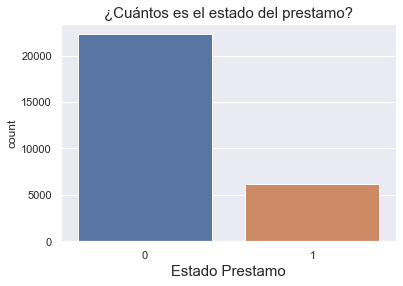

In [19]:
sns.countplot(data = data, x = 'loan_status')
plt.xlabel('Estado Prestamo', fontsize = 15)
plt.title('¿Cuántos es el estado del prestamo?', fontsize = 15)
plt.show()

In [20]:
data.loan_status.value_counts()

0    22313
1     6188
Name: loan_status, dtype: int64

In [21]:
100*data['loan_status'].value_counts(normalize=True)

0    78.288481
1    21.711519
Name: loan_status, dtype: float64

In [22]:
data.groupby(["loan_status"]).mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,27.818805,71268.077757,4.971541,9278.035226,10.466937,0.148223,5.835746
1,27.449741,50018.222043,4.136070,11030.551067,13.131180,0.246299,5.673400


In [23]:
data.groupby(["loan_status"]).count()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
loan_status,,,,,,,,,,,
0,22313,22313,22313,22313,22313,22313,22313,22313,22313,22313,22313
1,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188


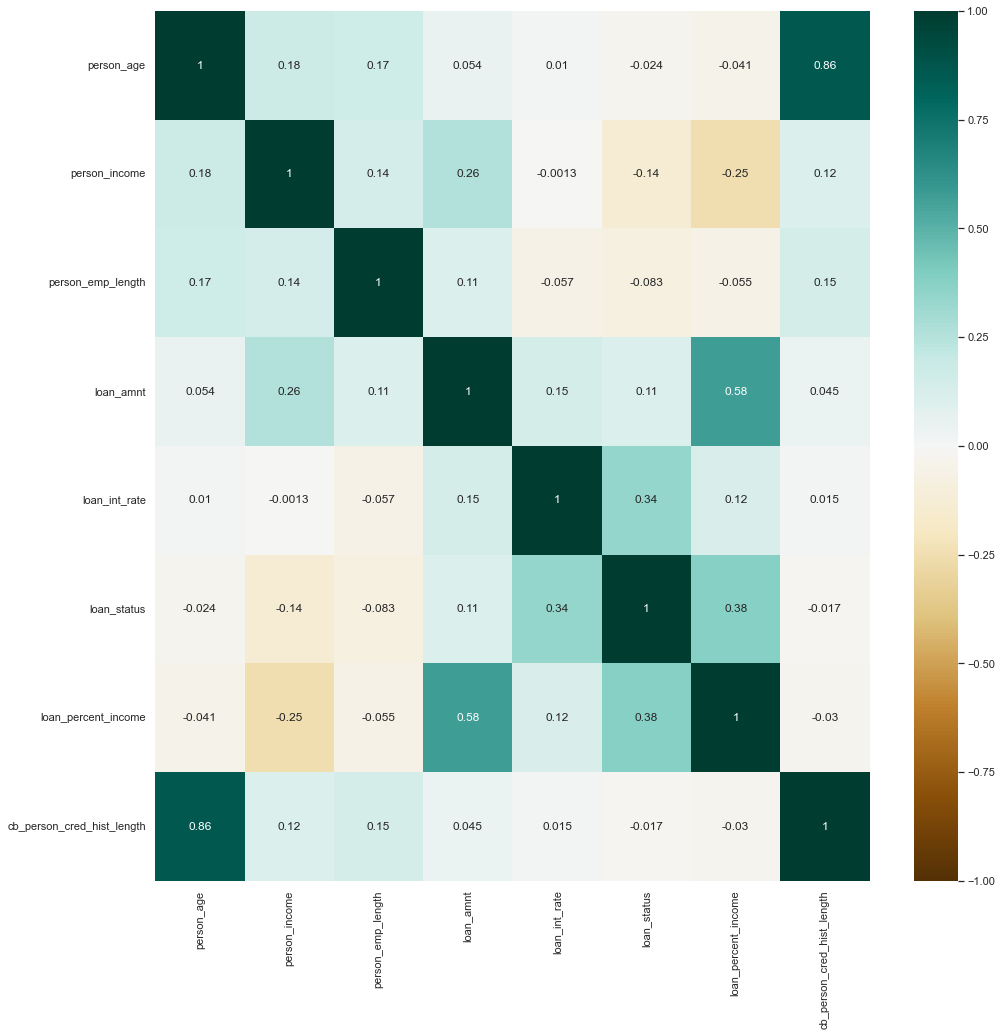

In [24]:
#Heatmap
plt.figure(figsize=(16, 16))

sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

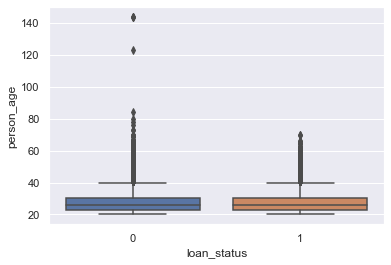

In [25]:
sns.boxplot(x='loan_status',y='person_age',data=data)
plt.show()

In [26]:
data.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.178987,0.165624,0.054246,0.010170,-0.024091,-0.040782,0.859621
person_income,0.178987,1.000000,0.136427,0.264942,-0.001346,-0.140456,-0.251487,0.116622
person_emp_length,0.165624,0.136427,1.000000,0.110934,-0.056607,-0.082852,-0.055033,0.146486
loan_amnt,0.054246,0.264942,0.110934,1.000000,0.146026,0.114153,0.577708,0.045334
loan_int_rate,0.010170,-0.001346,-0.056607,0.146026,1.000000,0.339995,0.123441,0.014562
loan_status,-0.024091,-0.140456,-0.082852,0.114153,0.339995,1.000000,0.380000,-0.016559
loan_percent_income,-0.040782,-0.251487,-0.055033,0.577708,0.123441,0.380000,1.000000,-0.029690
cb_person_cred_hist_length,0.859621,0.116622,0.146486,0.045334,0.014562,-0.016559,-0.029690,1.000000


In [27]:
x = data.drop(['loan_status'], axis=1)
y = data['loan_status']

In [28]:
#define category features
data_cat = x.select_dtypes(include=['object'])

# Calculate and display the number of unique values for each 'object' column
for column in data_cat.columns:
    unique_count = data_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'person_home_ownership' has 4 unique values.
Column 'loan_intent' has 6 unique values.
Column 'loan_grade' has 7 unique values.
Column 'cb_person_default_on_file' has 2 unique values.


In [29]:
# Encoding Categorical Variables
x_encoded = pd.get_dummies(x, columns=data_cat.columns)
x_encoded

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,1,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0.15,19,1,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,0.46,28,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0.10,26,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_encoded, y)

In [31]:
scaler = StandardScaler()
scaler.fit(x_resampled)
x_scaled = scaler.transform(x_resampled)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=42)

In [33]:


def create_model(units1=64, units2=32, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=units2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
# Define the hyperparameter search
param_dist = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1]
}

best_accuracy = 0
best_hyperparameters = None

for _ in range(10):  # You can adjust the number of iterations
    hyperparameters = {param: np.random.choice(values) for param, values in param_dist.items()}
    model = create_model(**hyperparameters)
    model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)
    y_pred = (model.predict(x_test) > 0.5).astype('int32')
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Hyperparameters: {hyperparameters}, Accuracy: {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = hyperparameters

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)

Epoch 1/50
1116/1116 [==============================] - 2s 1ms/step - loss: 0.2268 - accuracy: 0.9161
Epoch 2/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1967 - accuracy: 0.9283
Epoch 3/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1863 - accuracy: 0.9345
Epoch 4/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1839 - accuracy: 0.9349
Epoch 5/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1787 - accuracy: 0.9379
Epoch 6/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1756 - accuracy: 0.9388
Epoch 7/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1735 - accuracy: 0.9398
Epoch 8/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1722 - accuracy: 0.9404
Epoch 9/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1710 - accuracy: 0.9406
Epoch 10/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.173

1116/1116 [==============================] - 1s 1ms/step - loss: 0.6256 - accuracy: 0.6861
Epoch 30/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.6802
Epoch 31/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.5671 - accuracy: 0.6932
Epoch 32/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.5693 - accuracy: 0.7038
Epoch 33/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.5100 - accuracy: 0.7206
Epoch 34/50
1116/1116 [==============================] - 4s 3ms/step - loss: 0.5114 - accuracy: 0.7190
Epoch 35/50
1116/1116 [==============================] - 2s 1ms/step - loss: 0.5229 - accuracy: 0.7330
Epoch 36/50
1116/1116 [==============================] - 2s 1ms/step - loss: 0.4708 - accuracy: 0.7568
Epoch 37/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.5843 - accuracy: 0.7648
Epoch 38/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6484 -

1116/1116 [==============================] - 1s 1ms/step - loss: 0.6176 - accuracy: 0.6559
Epoch 6/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6467 - accuracy: 0.5876
Epoch 7/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6474 - accuracy: 0.5686
Epoch 8/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6266 - accuracy: 0.5885
Epoch 9/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6695 - accuracy: 0.6456
Epoch 10/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6801 - accuracy: 0.5809
Epoch 11/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.5838 - accuracy: 0.6424
Epoch 12/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6472 - accuracy: 0.6750
Epoch 13/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.6254
Epoch 14/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6796 - acc

1116/1116 [==============================] - 1s 1ms/step - loss: 0.6949 - accuracy: 0.4990
Epoch 34/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6946 - accuracy: 0.5007
Epoch 35/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.5011
Epoch 36/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.4984
Epoch 37/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.4972
Epoch 38/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.7014 - accuracy: 0.5001
Epoch 39/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6952 - accuracy: 0.5003
Epoch 40/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.4987
Epoch 41/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6962 - accuracy: 0.5003
Epoch 42/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.6950 -

1116/1116 [==============================] - 1s 1ms/step - loss: 0.1702 - accuracy: 0.9406
Epoch 10/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1696 - accuracy: 0.9410
Epoch 11/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1665 - accuracy: 0.9425
Epoch 12/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1682 - accuracy: 0.9418
Epoch 13/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1637 - accuracy: 0.9440
Epoch 14/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1641 - accuracy: 0.9433
Epoch 15/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1633 - accuracy: 0.9431
Epoch 16/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1615 - accuracy: 0.9447
Epoch 17/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1615 - accuracy: 0.9441
Epoch 18/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1599 -

1116/1116 [==============================] - 2s 2ms/step - loss: 0.4425 - accuracy: 0.7816
Epoch 38/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.4346 - accuracy: 0.7883
Epoch 39/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.4518 - accuracy: 0.7736
Epoch 40/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.4647 - accuracy: 0.7649
Epoch 41/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.6127 - accuracy: 0.7468
Epoch 42/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.5136 - accuracy: 0.7169
Epoch 43/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.4605 - accuracy: 0.7659
Epoch 44/50
1116/1116 [==============================] - 2s 1ms/step - loss: 0.5432 - accuracy: 0.7363
Epoch 45/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.4948 - accuracy: 0.7355
Epoch 46/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.4789 -

1116/1116 [==============================] - 1s 1ms/step - loss: 0.1657 - accuracy: 0.9418
Epoch 14/50
1116/1116 [==============================] - 1s 977us/step - loss: 0.1643 - accuracy: 0.9437
Epoch 15/50
1116/1116 [==============================] - 1s 993us/step - loss: 0.1631 - accuracy: 0.9443
Epoch 16/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1626 - accuracy: 0.9443
Epoch 17/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1625 - accuracy: 0.9444
Epoch 18/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1601 - accuracy: 0.9457
Epoch 19/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1612 - accuracy: 0.9450
Epoch 20/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1587 - accuracy: 0.9452
Epoch 21/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1582 - accuracy: 0.9452
Epoch 22/50
1116/1116 [==============================] - 1s 979us/step - loss: 0.

In [34]:
final_model = create_model(**best_hyperparameters)
history = final_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.3177 - accuracy: 0.8733 - val_loss: 0.1996 - val_accuracy: 0.9280
Epoch 2/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2221 - accuracy: 0.9196 - val_loss: 0.1879 - val_accuracy: 0.9314
Epoch 3/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2030 - accuracy: 0.9250 - val_loss: 0.1801 - val_accuracy: 0.9348
Epoch 4/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1940 - accuracy: 0.9310 - val_loss: 0.1746 - val_accuracy: 0.9371
Epoch 5/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1883 - accuracy: 0.9338 - val_loss: 0.1711 - val_accuracy: 0.9400
Epoch 6/50
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1817 - accuracy: 0.9375 - val_loss: 0.1689 - val_accuracy: 0.9402
Epoch 7/50
1116/1116 [==============================] - 1s 1ms/step - loss: 0.1785 - accuracy: 0.9374 - val_loss: 0.1630 - val_accuracy:

In [35]:
# Evaluate the model
test_loss, test_acc = final_model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc} \nTest loss: {test_loss}')

279/279 [==============================] - 0s 742us/step - loss: 0.1455 - accuracy: 0.9506

Test accuracy: 0.9505937695503235 
Test loss: 0.14549987018108368


In [36]:
def plot_learning_curve(history):
    # Create subplots with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training and validation loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    # Plot training and validation accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    # Show the plot    
    plt.show()

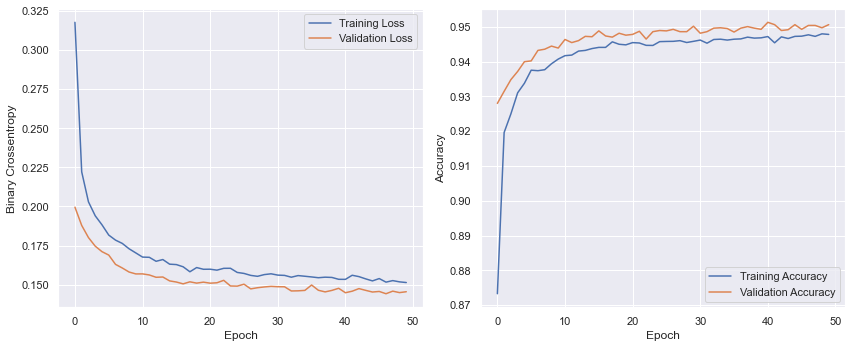

In [37]:
plot_learning_curve(history)


In [38]:
y_pred = final_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

279/279 [==============================] - 0s 661us/step


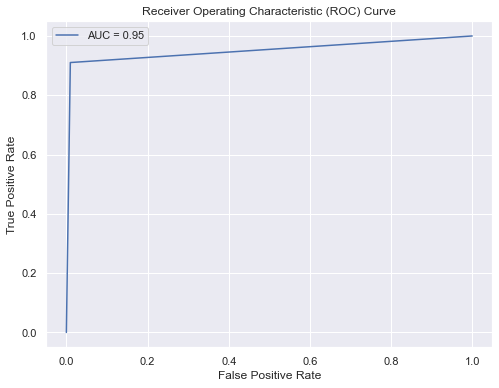

In [39]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Confusion Matrix')

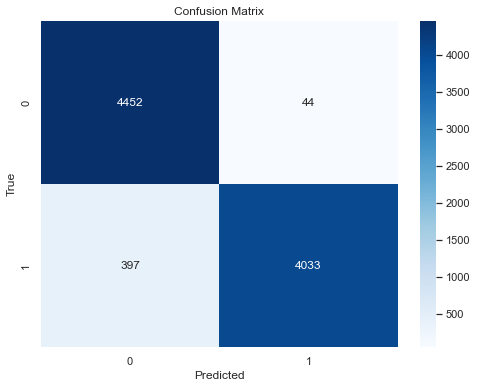

In [40]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix')

In [41]:

print(f'classification report:')
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4496
           1       0.99      0.91      0.95      4430

    accuracy                           0.95      8926
   macro avg       0.95      0.95      0.95      8926
weighted avg       0.95      0.95      0.95      8926



In [42]:
### SVM

In [43]:
#x_train, x_test, y_train, y_test ---> X_train, X_test, y_train, y_test

In [44]:
#Validación Cruzada

cv_scores = cross_val_score(SVC(kernel='linear',probability=True),x_train,y_train,cv=5)

In [45]:
#Accuracy
print(cv_scores)

[0.91638655 0.91820728 0.90952381 0.91414566 0.90588235]


In [46]:
#Accuracy Promedio
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.912829131652661


In [47]:
#Tuning
#param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
param_grid = {'C': [0.1,1,5,10,50,100], 
              'gamma': [2,1.5,1,0.1,0.01,0.001],
              'kernel': ['rbf']}

In [48]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time= 1.3min
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time= 1.4min
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time= 1.2min
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time= 1.2min
[CV] END .........................C=0.1, gamma=2, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time= 1.1min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.1min
[CV] END .........................C=0.1, gamma=

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 5.2min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 5.4min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 4.5min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time= 4.3min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.2min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.1min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.1min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.0min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time= 1.0min
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  23.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  23.6s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  27.3s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'gamma': [2, 1.5, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [49]:
print(grid.best_estimator_)

SVC(C=50, gamma=0.01)


In [ ]:
classifier = SVC(kernel='rbf',C = 10,gamma = 2,probability=True).fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
#ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_pred_prob = classifier.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
#### Randon Forest

In [ ]:
cv_scores = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)

In [ ]:
print(cv_scores)

In [ ]:
print("cv_scores mean:{}".format(np.mean(cv_scores)))

In [ ]:
#Tuning
#n_estimators: Número de árboles
#max_features: Cantidad de variables a considerar al buscar el mejor split
#max_depth: Profundidad del árbol

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [ ]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_estimator_)

In [ ]:
#Random Forest
classifier = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train, y_train)

In [ ]:
feature_scores = pd.Series(classifier.feature_importances_, index=['housing','loan','duration']).sort_values(ascending=False)
feature_scores

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_pred_prob = classifier.predict_proba(X_test)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))